# Mission: Optimisez la gestion des données d'une boutique

## 1. Jointure des différents Dataframes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importer le fichier erp.csv
df_erp = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P5/erp.csv', sep = ';')
df_erp.head() # voir les 5 premières lignes

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock


In [4]:
df_erp.describe()

,product_id,onsale_web,stock_quantity
count,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,26.496970
std,902.644635,0.337506,45.892422
min,3847.000000,0.000000,0.000000
25%,4348.000000,1.000000,1.000000
50%,4907.000000,1.000000,11.000000
75%,5805.000000,1.000000,34.000000
max,7338.000000,1.000000,578.000000


In [5]:
# connaitre le typage de chaque variable du tableau
df_erp.dtypes

product_id         int64
onsale_web         int64
price             object
stock_quantity     int64
stock_status      object
dtype: object

In [6]:
# voir le nombre de valeur manquante de chaque colonne du tableau
df_erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [7]:
# tester l'unicité de la clé primaire product_id
df_erp.duplicated('product_id').sum()

0

In [8]:
# Mise en forme du tableau
#df_erp["price"].replace(",", '.') # remplacer la valeur "," par "."
df_erp["price"] = df_erp["price"].str.replace(",", ".")
df_erp["price"] = df_erp["price"].astype("float")
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [9]:
# connaitre le typage de chaque variable du tableau
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [10]:
# importer le fichier liaison.csv
df_liaison = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P5/liaison.csv', sep = ';')
df_liaison.head() # voir les 5 premières lignes

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [11]:
# connaitre le typage de chaque variable du tableau
df_liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [12]:
# voir le nombre de valeur manquante de chaque colonne du tableau
df_liaison.isna().sum()

product_id     0
id_web        91
dtype: int64

In [13]:
# merger les 2 tableaux 
df_erp_liaison = pd.merge(df_erp,df_liaison,how="outer", on='product_id')
df_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [14]:
# filtrage des valeurs manquantes pour les analyser
filtered_df_erp_liaison = df_erp_liaison[df_erp_liaison['id_web'].isnull()]
filtered_df_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
19,4055,0,86.1,0,outofstock,NaN
49,4090,0,73.0,0,outofstock,NaN
50,4092,0,47.0,0,outofstock,NaN
119,4195,0,14.1,0,outofstock,NaN
131,4209,0,73.5,0,outofstock,NaN
...,...,...,...,...,...,...
817,7196,0,31.0,55,instock,NaN
818,7200,0,31.0,6,instock,NaN
819,7201,0,31.0,18,instock,NaN
820,7203,0,45.0,30,instock,NaN


Nous remarquons que les 91 valeurs manquantes de l'id_web correspondent à des produits qui ne sont pas vendus sur le web ou sont en "out of stock".
Donc on peut proceder à leur imputation sans incidence sur la dataframe.

In [15]:
# retirons les lignes avec des valeurs manquantes
df_erp_liaison.dropna(inplace=True)
# vérifions le résultat
df_erp_liaison.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
id_web            0
dtype: int64

In [16]:
# verification de l'unicité de la clé secondaire id_web
df_erp_liaison.duplicated('id_web').sum()

0

In [17]:
df_erp_liaison = df_erp_liaison[['product_id','id_web','onsale_web','price','stock_quantity','stock_status']]
df_erp_liaison

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
792,7023,15891,1,27.5,15,instock
793,7025,15887,1,69.0,2,instock
822,7247,13127-1,1,54.8,23,instock
823,7329,14680-1,0,26.5,14,instock


In [18]:
# importer le fichier web.csv
df_web = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P5/web.csv', sep = ';')
df_web.head() # voir les 5 premières lignes

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
# Renommage de la colonne "sku" qui correspond à "id_web"
df_web.rename(columns={'sku': 'id_web'}, inplace=True)
df_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [20]:
# connaitre le typage de chaque variable du tableau
df_web.dtypes

id_web                    object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object

In [21]:
# voir si on a des doublons
df_web.duplicated('id_web').sum()

798

In [22]:
# merger le tableau disponibilité_Alimentaire et la population par pays pour l'année 2017
df_erp_liaison_web = pd.merge(df_erp_liaison,df_web,how="inner", on='id_web')
df_erp_liaison_web

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,7025,15887,1,69.0,2,instock,0,0,0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1424,7247,13127-1,1,54.8,23,instock,0,0,0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1425,7247,13127-1,1,54.8,23,instock,0,0,0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1426,7338,16230,1,16.3,45,instock,0,0,0,0.0,...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [23]:
# suppression des doublons
df_erp_liaison_web.drop_duplicates(subset ="id_web", keep = 'first', inplace=True)
df_erp_liaison_web

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,4032,19814,1,14.1,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,4039,19815,1,46.0,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,6930,16135,1,8.4,83,instock,0,0,0,0.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1420,7023,15891,1,27.5,15,instock,0,0,0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1422,7025,15887,1,69.0,2,instock,0,0,0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1424,7247,13127-1,1,54.8,23,instock,0,0,0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## 2. Calcul du chiffre d'affaires total réalisé en ligne

In [24]:
# calcul du chiffre d'affaire de chaque produits
df_erp_liaison_web["Chiffre d'affaire"] = (df_erp_liaison_web["price"]*df_erp_liaison_web["total_sales"])

# calcul du chiffre d'affaire total
Chiffre_Affaire_total = df_erp_liaison_web["Chiffre d'affaire"].sum()
Chiffre_Affaire_total
print("le chiffre d’affaires total réalisé en ligne est de", Chiffre_Affaire_total, "euros")

le chiffre d’affaires total réalisé en ligne est de 70568.6 euros


## 3. Analyse de certains prix des produits 

Pour visualiser la dispersion des prix des produits (variable "price"), nous allons utilisé un Boxplot pour visualiser et identifier les valeurs extrémes.

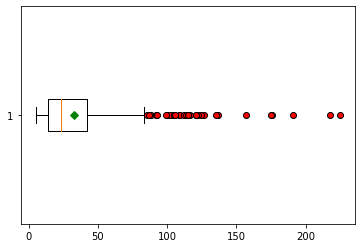

In [25]:
# Visualisation de la variable "price" en utilisant un Boxplot
red_circle = dict(markerfacecolor='red', marker='o') # choix de forme et la couleur des outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') # representation de la moyenne des valeurs

Graphe = plt.boxplot(x=df_erp_liaison_web["price"], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape)

In [26]:
# Calcul des valeurs extremes

## First Quartile
Q1 = df_erp_liaison_web["price"].quantile(0.25)
print("Q1 =", Q1)

## 3rd Quartile
Q3 = df_erp_liaison_web["price"].quantile(0.75)
print("Q3 =",Q3)

## Interquartile range
IQR = Q3-Q1 
print("IQR =",IQR)

## la valeur minimale
Fence_low  = Q1-1.5*IQR
print("la valeur basse est",Fence_low)
## la valeur maximale
Fence_high = Q3+1.5*IQR
print("la valeur haute est",Fence_high)


Q1 = 14.1
Q3 = 42.175000000000004
IQR = 28.075000000000003
la valeur basse est -28.012500000000003
la valeur haute est 84.28750000000001


In [27]:
# filtrage des Outliers (valeurs atypiques)
df_outliers = df_erp_liaison_web.loc[(df_erp_liaison_web["price"] > Fence_low) ^ (df_erp_liaison_web["price"] < Fence_high)]
df_outliers

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Chiffre d'affaire
126,4115,15382,1,100.0,11,instock,0,0,0,0.0,...,2020-02-08 11:45:02,2020-02-08 10:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
130,4132,11668,1,88.4,5,instock,0,0,0,0.0,...,2020-02-20 09:55:02,2020-02-20 08:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
398,4352,15940,1,225.0,0,outofstock,0,0,0,0.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
402,4355,12589,1,126.5,2,instock,0,0,0,0.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
410,4359,13853,1,85.6,0,outofstock,0,0,0,0.0,...,2019-12-23 09:30:11,2019-12-23 08:30:11,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,85.6
436,4402,3510,1,176.0,8,instock,0,0,0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
438,4404,3507,1,108.5,2,instock,0,0,0,0.0,...,2020-08-12 09:30:16,2020-08-12 07:30:16,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,217.0
442,4406,7819,1,157.0,3,instock,0,0,0,0.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
444,4407,3509,1,104.0,6,instock,0,0,0,0.0,...,2020-07-04 09:45:03,2020-07-04 07:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,104.0
454,4582,12857,1,109.6,7,instock,0,0,0,0.0,...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [28]:
df_erp_liaison_web_final = df_erp_liaison_web.loc[(df_erp_liaison_web["price"] > Fence_low) & (df_erp_liaison_web["price"] < Fence_high)]
df_erp_liaison_web_final

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Chiffre d'affaire
0,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
2,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
4,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
6,4032,19814,1,14.1,0,outofstock,0,0,0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
8,4039,19815,1,46.0,0,outofstock,0,0,0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,6930,16135,1,8.4,83,instock,0,0,0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0
1420,7023,15891,1,27.5,15,instock,0,0,0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
1422,7025,15887,1,69.0,2,instock,0,0,0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
1424,7247,13127-1,1,54.8,23,instock,0,0,0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
